# Quality Prediction of Red and White wine:

![Wine Quality](https://media.giphy.com/media/UtyJkFjwPP5NS/giphy.gif)

# Introduction

In this AI final project, we are analysing a wine dataset that contains details of the Red and White wine. The quality of wine is predicted based on the below features:

**`Fixed Acidity:`**   Fixed acidity is a property of the sample that refers to the group of low volatility organic acids such malic, lactic, tartaric, or citric acids.

**`Volatile Acidity:`** The quantity of acetic acid in wine, which can provide an unpleasant vinegar flavour at high amounts. Formic acid, acetic acid, propionic acid, and butyric acid are the short chain organic acids that may be recovered from the sample using the distillation method and are considered to have a volatile acidity.

**`Citric Acid:`** Citric acid, which is present in wines in small amounts, can give them a "freshness" and flavour. A weak organic acid without colour, citric acid is. Citrus fruits naturally contain it.


**`Residual Sugar:`** It's uncommon to discover wines with less than 1 gramme of sugar per litre of wine once fermentation has stopped. The sugars that remain unfermented in a final wine are referred to as residual sugar. G/L stands for grammes of sugar per litre. The sweetness of a wine is influenced by the residual sugar content, and in the EU, the RS level is associated with particular labelling words.


**`Chlorides:`** How much salt is in the wine and The ions taken from the skins during fermentation are the reason for the increased chloride extraction during the production of red wine. In order to prevent finished wine from exceeding the maximum permitted quantity of 606mg/L chloride, red juice should only contain 356mg/L of chloride ions (356mg/L in red juice multiplied by 1.7 equals 606).

**`Free sulfur dioxide: `** Free sulfites have antimicrobial and antioxidant effects. The sulfites that have interacted with other molecules in the wine medium are known as bound sulfites. The total sulfite concentration is calculated as the sum of the free and bound sulfites.

**`Total sulfur dioxide:`** Total Sulfur Dioxide (TSO2) is the sum of the free SO2 in the wine and the SO2 bonded to other compounds in the wine such as aldehydes, pigments, or sugars.

**`Density:`** Hydrometers  are used by winemakers to determine the density of juice, fermenting wine, and produced wine in proportion to pure water. This is referred to as specific gravity (SG).

**`pH:`** For starters, high pH wines are more prone to microbial deterioration. Sulfur dioxide (typically in the form of potassium metabisulfite) has traditionally been used to keep wines stable throughout ageing.


**`sulphates:`** Wine sulfites are naturally present in low concentrations in all wines and are one of hundreds of chemical byproducts produced during the fermentation process.

**`Alcohol:`** The % of alcohol content in wine

**`Quality::`** Predictor variable (Score ranges between 3 and 9 based on observed data.)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
import pickle as pckl
import seaborn as sns

## Loading wine dataset 

In [2]:
wine_csv = pd.read_csv('/Users/renukaambarapu/Downloads/wine-quality-white-and-red.csv')

## Dataset Description :

In [3]:
wine_csv.shape

(6497, 13)

In [4]:
wine_csv.columns=['TYPE','FIXED_ACIDITY','VOLATILE_ACIDITY','CITRIC_ACID','RESIDUAL_SUGAR','CHLORIDES','FREE_SULFUR_DIOXIDE','TOTAL_SULFUR_DIOXIDE','DENSITY','pH','SULPHATES','ALCOHOL','QUALITY']
wine_csv.columns

Index(['TYPE', 'FIXED_ACIDITY', 'VOLATILE_ACIDITY', 'CITRIC_ACID',
       'RESIDUAL_SUGAR', 'CHLORIDES', 'FREE_SULFUR_DIOXIDE',
       'TOTAL_SULFUR_DIOXIDE', 'DENSITY', 'pH', 'SULPHATES', 'ALCOHOL',
       'QUALITY'],
      dtype='object')

In [5]:
wine_csv.head()

,TYPE,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,pH,SULPHATES,ALCOHOL,QUALITY
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Initial Information

In [6]:
wine_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TYPE                  6497 non-null   object 
 1   FIXED_ACIDITY         6497 non-null   float64
 2   VOLATILE_ACIDITY      6497 non-null   float64
 3   CITRIC_ACID           6497 non-null   float64
 4   RESIDUAL_SUGAR        6497 non-null   float64
 5   CHLORIDES             6497 non-null   float64
 6   FREE_SULFUR_DIOXIDE   6497 non-null   float64
 7   TOTAL_SULFUR_DIOXIDE  6497 non-null   float64
 8   DENSITY               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  SULPHATES             6497 non-null   float64
 11  ALCOHOL               6497 non-null   float64
 12  QUALITY               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**`Information:`** Dataset  consists of 6497 records and 13 columns and has no NULL data and the data type of Type column is object  are all the remaining columns are in numeric

In [7]:
wine_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
FIXED_ACIDITY,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
VOLATILE_ACIDITY,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
CITRIC_ACID,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
RESIDUAL_SUGAR,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
CHLORIDES,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
FREE_SULFUR_DIOXIDE,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
TOTAL_SULFUR_DIOXIDE,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
DENSITY,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
SULPHATES,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


**`statistical Oservation: `**
    
The mean of fixed acidity is 7.21, the maximum value is 15.9

The mean of volatile acidity is 0.33, the maximum value is 1.58

The mean of citric acid is 0.31, the maximum value is 1.66

The mean of residual sugar is 5.44, the maximum value is 65.8

The mean of chlorides is 0.05, the maximum value is 0.61

The mean of free sulfur dioxide is 30.52, the maximum value is 289

The mean of total sulfur dioxide is 115.74, the maximum value is 440

The mean of density is 0.99, the maximum value is 1.03

The mean of pH is 3.21, the maximum value is 4.01

The mean of sulphates is 0.53, the maximum value is 2

The mean of alcohol is 10.49, the maximum value is 14.90

The mean of quality is 5.81, the maximum value is 9

In [8]:
wine_csv.groupby(['TYPE']).size().reset_index(name='COUNT')

,TYPE,COUNT
0,red,1599
1,white,4898


**`Size:`** Dataset  consists of 1599 records of red wine nad 4898 records of white wine

## EDA and Data Visualization :

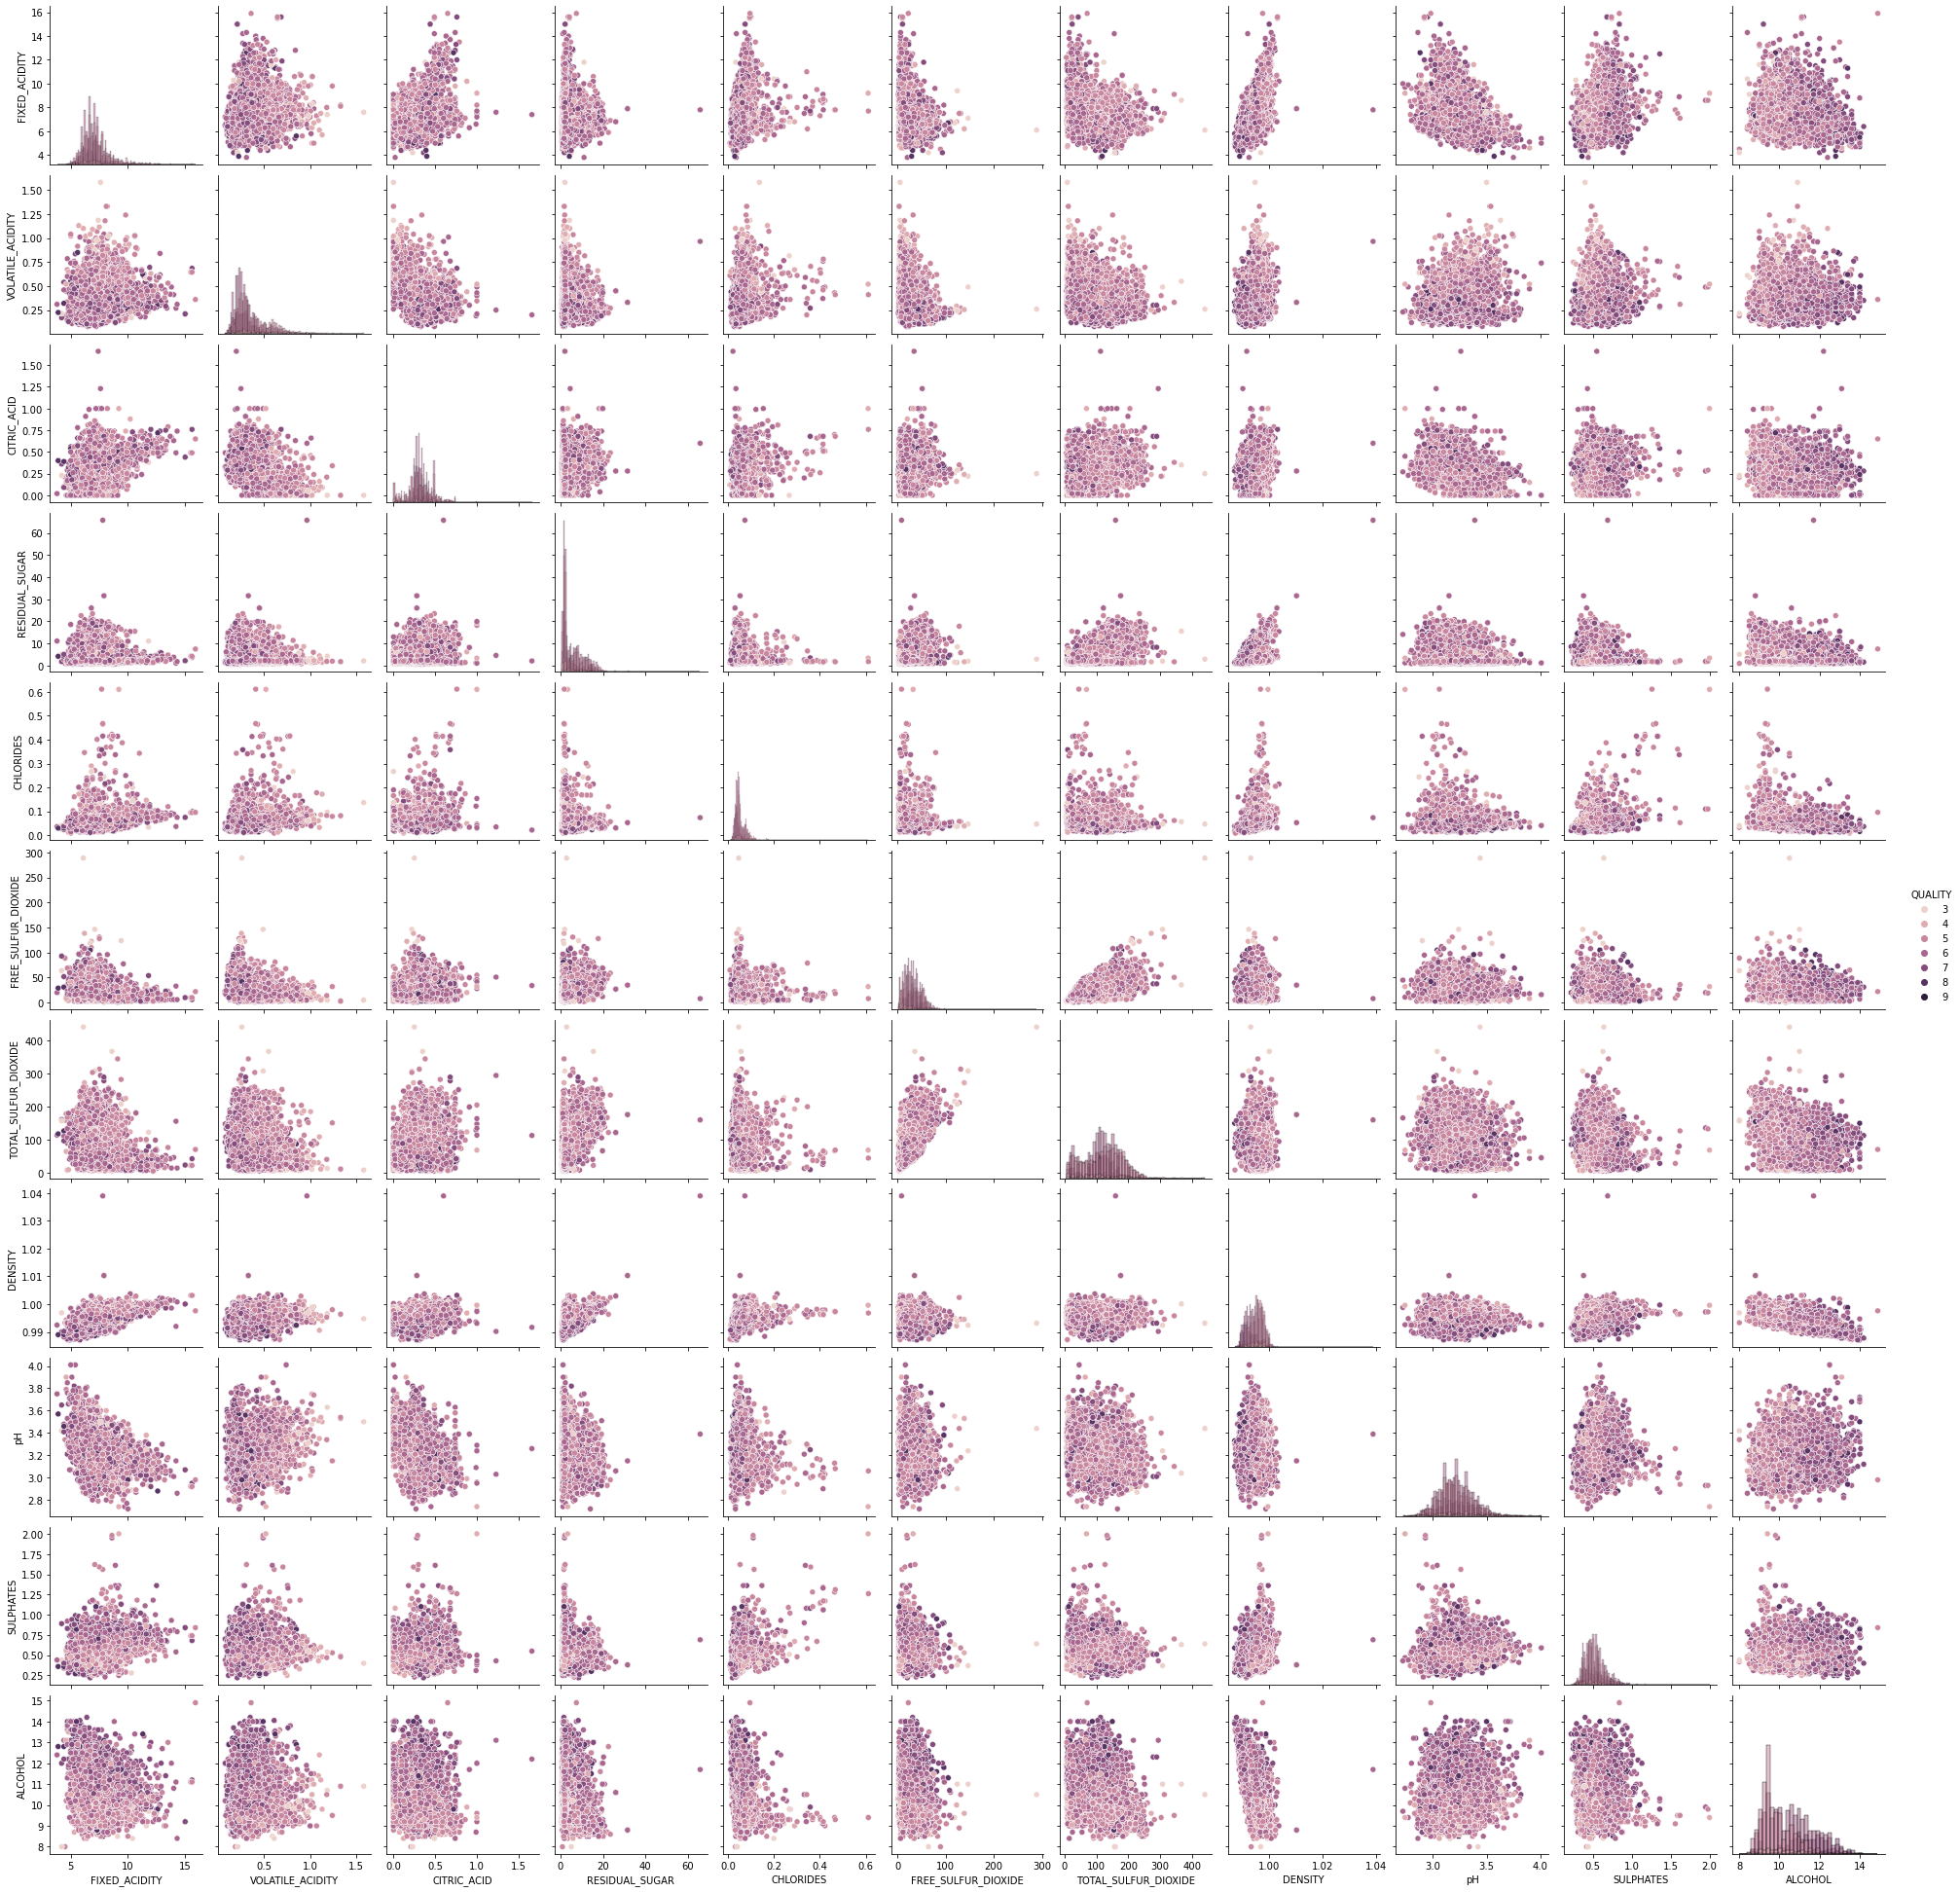

In [9]:
sns.pairplot(wine_csv,diag_kind = "hist",hue='QUALITY')

pyplt.savefig('wine_pair_plot.png')

pyplt.show()

**`Pairplot:`** pair plot shows scatterplots that is showing pairwise relationship between all the  variables 

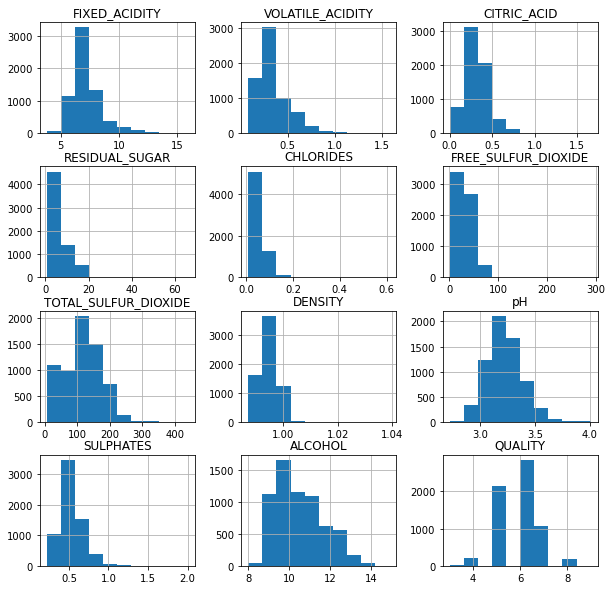

In [10]:
wine_csv.hist(bins=10,figsize=(10,10))
pyplt.savefig('Wine_Histogram.png')
pyplt.show()

**`Histogram:`**  Histogram showing frequency distribution of each column.

In [1]:
for i, val in enumerate(wine_csv.columns):
        if val != "QUALITY":
            plot = pyplt.figure(i, figsize = (10,5))
            sns.histplot(data = wine_csv, x = val,
                        hue="TYPE", palette="Blues_d",kde=True).set(title = 'Distribution of : ' + str(val))
            pyplt.savefig('wine_'+str(val)+'.png')

NameError: name 'wine_csv' is not defined

**`Explanation :`** Using for loop to show the smooth distribution and show on the histogram contains a group of bars that show the density of the data (i.e., the count of the number of records) for different ranges our variables in our dataset.

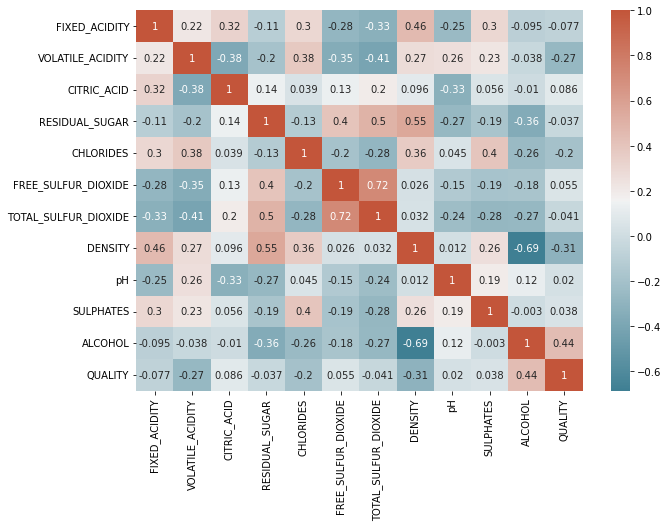

In [12]:
corr = wine_csv.corr()
fig1, sub = pyplt.subplots(figsize=(10,7))

sub = sns.heatmap(corr,
cmap=sns.diverging_palette(220, 20, as_cmap=True),
ax=sub,
annot=True
)
pyplt.savefig('wine_correlation.png')

**`Correlation :`** Using correlation heatmap of seaborn to explain correlation percentage between all the variables 

**` Removing columns with percent greater than 7 of correlation `** as there is no point of having more columns with same correlation

In [13]:
for col in range(len(wine_csv.corr().columns)):
    for val in range(col):
        if abs(wine_csv.corr().iloc[col,val]) > 0.7:
            print(wine_csv.corr().columns[val],wine_csv.corr().columns[col])

FREE_SULFUR_DIOXIDE TOTAL_SULFUR_DIOXIDE


In [14]:
wine_in = wine_csv.drop("FREE_SULFUR_DIOXIDE",axis='columns')
wine_in.head()

,TYPE,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,TOTAL_SULFUR_DIOXIDE,DENSITY,pH,SULPHATES,ALCOHOL,QUALITY
0,white,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6


**`Display of data :`** showing data after removal of FREE_SULFUR_DIOXIDE column

In [15]:
wine_in['QUALITY'].unique()
wine_in.groupby("QUALITY").size()

QUALITY
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [16]:
wine_in['QUALITY'].mean()

5.818377712790519

**`Display of counts and mean :`** showing data counts of each quality of wine and average of the quality

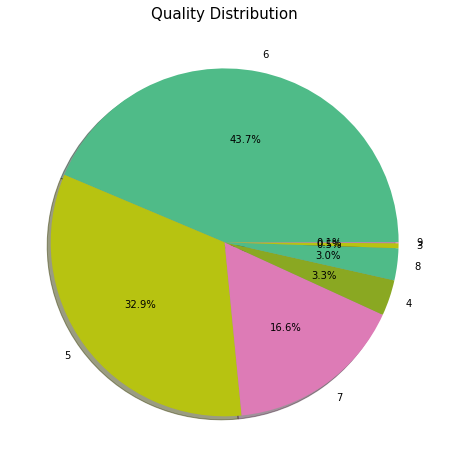

In [17]:


pyplt.figure(figsize=(8,8))

ind = wine_in['QUALITY'].value_counts().index
siz = wine_in['QUALITY'].value_counts().values

pyplt.pie(siz, labels=ind,colors=colors,autopct='%1.1f%%',shadow = True,)
pyplt.title('Quality Distribution',color = 'black', fontsize=15)
pyplt.savefig('Quality Distribution Pie.png')
pyplt.show()

In [18]:
X = wine_in.drop("TYPE",axis=1)
y = wine_in['TYPE']
X.head()

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,TOTAL_SULFUR_DIOXIDE,DENSITY,pH,SULPHATES,ALCOHOL,QUALITY
0,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
X['WINE_QUALITY'] = X['QUALITY'].apply(lambda x: 1 if x>5. else 0)
X.tail()
X.drop("QUALITY",axis=1)

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,TOTAL_SULFUR_DIOXIDE,DENSITY,pH,SULPHATES,ALCOHOL,WINE_QUALITY
0,7.0,0.270,0.36,20.7,0.045,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,0


# METHODS

### Splitting the traning and testing data by using train_test_split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)

### Features Standardize by mean elimination and scaling to unit variance.

In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [22]:
print(X_train , X_test)

[[-0.3263874  -0.71492118  0.21668013 ...  0.17320391  1.36132652
   0.76985541]
 [-0.24879972 -0.71492118  0.00633231 ...  0.59457525  0.21524344
   0.76985541]
 [-0.3263874  -0.71492118  0.28679607 ... -1.09091009 -0.93083965
  -1.29894522]
 ...
 [-0.0160367   0.85390507 -1.74656617 ...  0.59457525  1.36132652
   0.76985541]
 [-0.24879972 -0.29254488  0.00633231 ...  0.59457525 -0.93083965
  -1.29894522]
 [-0.48156274  2.78476815 -2.02702992 ...  1.43731792 -0.93083965
  -1.29894522]] [[-1.10226414  0.12983142 -0.41436332 ...  0.67884952  0.21524344
   0.76985541]
 [ 0.06155098  0.00915248 -0.13389957 ... -0.07961889  0.21524344
   0.76985541]
 [ 0.9150154  -0.29254488  0.56725982 ...  0.00465538 -0.93083965
  -1.29894522]
 ...
 [-0.24879972  0.43152878 -0.69482708 ...  0.93167232 -2.07692273
  -1.29894522]
 [ 0.37190168 -0.53390276 -0.13389957 ... -0.33244169 -0.93083965
  -1.29894522]
 [-0.09362437 -0.11152646 -0.13389957 ... -0.24816742  0.21524344
   0.76985541]]


**` ML Model Dictionary : `**  Creating dictionary to refer to all the given models 

1. KNeighborsClassifier
2. LogisticRegression
3. DecisionTreeClassifier
4. SupportVectorClassifier
5. RandomForestClassifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


ML_Models = {}

#KNeighborsClassifierModel

K_Neigh = KNeighborsClassifier()
ML_Models["K Neighbors Classifier"] = K_Neigh

#LogisticRegressionModel

Log_Reg = LogisticRegression(solver='lbfgs', max_iter=1000)
ML_Models["Logistic Regression"] = Log_Reg

#DecisionTreeClassifierModel

Des_Tree = DecisionTreeClassifier()
ML_Models["Decision Tree Classifier"] = Des_Tree

#SupportVectorClassifierModel

Sup_Vec = SVC(kernel="linear")
ML_Models["Support Vector Classifier"] = Sup_Vec


#RandomForestClassifierModel

Rand_Forest = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=2023)
ML_Models["Random Forest"] = Rand_Forest

**` Displaying Model Dictionary `**

In [24]:
print(ML_Models)

{'K Neighbors Classifier': KNeighborsClassifier(), 'Logistic Regression': LogisticRegression(), 'Decision Tree Classifier': DecisionTreeClassifier(), 'Support Vector Classifier': SVC(kernel='linear'), 'Random Forest': RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2023)}


**`Creating function to display Model metrics `**

1. Confusion matrix
2. Accuracy score
3. Confusion matrix display
4. Classification report


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


for M in ML_Models:
    ML_Models[M].fit(X_train,y_train)
    
def ML_Models_prediction(Name,ML_Model,X_test,y_test):
    print("=============================================================")   
    print("ML_Model:",Name)
    y_predicted = ML_Model.predict(X_test)
    Conf_Matrix = confusion_matrix(y_test,y_predicted)
    print("Confusion_Matrix:\n",Conf_Matrix)
    print("Accuracy_Score:",accuracy_score(y_test,y_predicted))
    Cond_Matrix_Disp = ConfusionMatrixDisplay(Conf_Matrix,display_labels=["white","red"])
    plot=Cond_Matrix_Disp.plot()
    print("Classification_Report:\n",classification_report(y_test,y_predicted))
    plot.ax_.set_title('Confusion Matrix : '+ str(Name))
    pyplt.show()
    print( "=============================================================" )

ML_Model: K Neighbors Classifier
Confusion_Matrix:
 [[ 395    5]
 [   2 1223]]
Accuracy_Score: 0.9956923076923077
Classification_Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       400
       white       1.00      1.00      1.00      1225

    accuracy                           1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



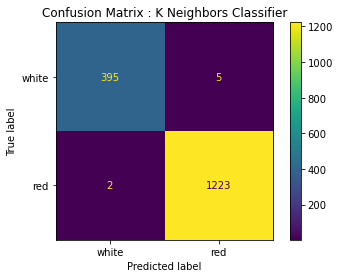

ML_Model: Logistic Regression
Confusion_Matrix:
 [[ 397    3]
 [   3 1222]]
Accuracy_Score: 0.9963076923076923
Classification_Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       400
       white       1.00      1.00      1.00      1225

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



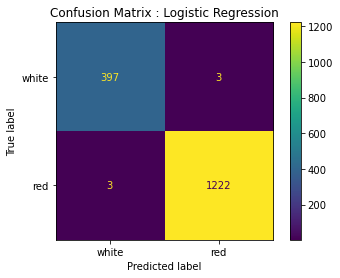

ML_Model: Decision Tree Classifier
Confusion_Matrix:
 [[ 392    8]
 [   8 1217]]
Accuracy_Score: 0.9901538461538462
Classification_Report:
               precision    recall  f1-score   support

         red       0.98      0.98      0.98       400
       white       0.99      0.99      0.99      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



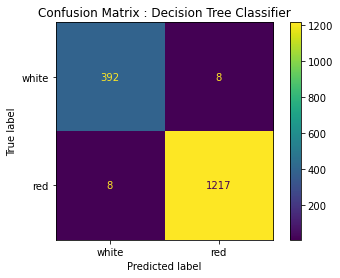

ML_Model: Support Vector Classifier
Confusion_Matrix:
 [[ 398    2]
 [   3 1222]]
Accuracy_Score: 0.9969230769230769
Classification_Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       400
       white       1.00      1.00      1.00      1225

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



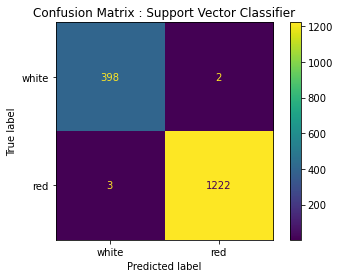

ML_Model: Random Forest
Confusion_Matrix:
 [[ 398    2]
 [   2 1223]]
Accuracy_Score: 0.9975384615384615
Classification_Report:
               precision    recall  f1-score   support

         red       0.99      0.99      0.99       400
       white       1.00      1.00      1.00      1225

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



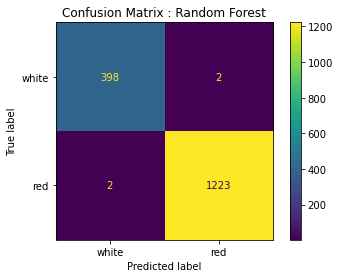

In [26]:
for M in ML_Models:
    ML_Models_prediction(M,ML_Models[M],X_test,y_test)

In [27]:
ML_Models_List = []
for M1 in ML_Models:
    ML_Models_List.append((M1,ML_Models[M1]))
ML_Models_List

[('K Neighbors Classifier', KNeighborsClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Support Vector Classifier', SVC(kernel='linear')),
 ('Random Forest',
  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2023))]

ML_Model: The Learner Model Ensemble
Confusion_Matrix:
 [[ 397    3]
 [   1 1224]]
Accuracy_Score: 0.9975384615384615
Classification_Report:
               precision    recall  f1-score   support

         red       1.00      0.99      0.99       400
       white       1.00      1.00      1.00      1225

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



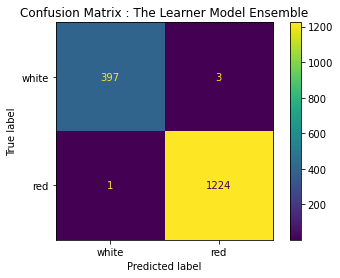

In [28]:
from sklearn.ensemble import VotingClassifier
Ensemble_Model = VotingClassifier(estimators = ML_Models_List, voting="hard")
Ensemble_Model.fit(X_train,y_train)
ML_Models_prediction("The Learner Model Ensemble",Ensemble_Model,X_test,y_test)

In [ ]:

from tensorflow.keras.models import Sequential as seq
import tensorflow as tf

from tf import keras
from keras import layers
from keras import kernel_regularizer as l2
from tensorflow.keras.models import Sequential as seq

factor=0.0001
rate=0.4


tf_model=sq([
    tf.keras.layers.Dense(160,input_shape=(12,),activation="relu",kernel_regularizer=l2(factor)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(120,activation="relu",kernel_regularizer=l2(factor)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(80,activation='relu',kernel_regularizer=l2(factor)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(40,activation='relu',kernel_regularizer=l2(factor)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(20,activation='relu',kernel_regularizer=l2(factor)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(10,activation='relu',kernel_regularizer=l2(factor)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

In [ ]:
# !conda install tensorflow==1.12.0

In [ ]:
class mycallbackClass(tf.keras.callbacks.Callback):
  def on_epoch_end(Name,epoch,logs={}):
    if(logs.get("val_accuracy")>0.95):
      print("Achived expected accuracy 90%", logs)
      Name.model.stop_training=True
callmyclass=mycallbackClass()

In [2]:
def Display_metrics(H, M):
    metric_train = H.history[M]
    args_metric = H.history['args_'+M]
    epochs = range(1, len(metrics_train) + 1)
    pyplt.plot(epochs, metric_train)
    pyplt.plot(epochs, 'args_'+M)
    pyplt.title('Training and validation '+ M)
    pyplt.xlabel("Epochs")
    pyplt.ylabel(M)
    pyplt.legend([M+"_train", 'args_'+M])
    pyplt.show()

In [ ]:
tf_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=tf_model.fit(X_train, y_train, batch_size = 256,verbose=2, 
                  epochs = 100,callmyclass=[callmyclass],validation_split=0.25)

In [ ]:
Display_metrics(history, 'accuracy')

In [ ]:
y_predicted=tf_model.predict(X_test)>0.5
y_predicted = y_predicted.astype("int")

print( "=============================================================" )    
print("Deep Learning Model: ANN_Model")
print("Accuracy_Score:",accuracy_score(y_test,y_predicted))
Conf_Matrix = confusion_matrix(y_test,y_predicted)
print("Confusion_Matrix:\n",Conf_Matrix)
Cond_Matrix_Disp = ConfusionMatrixDisplay(Conf_Matrix,display_labels=["white","red"])
plot=Cond_Matrix_Disp.plot()
print("Classification_Report:\n",classification_report(y_test,y_predicted))
plot.ax_.set_title('Confusion Matrix Display : ANN_Model ')
pyplt.show()
print( "=============================================================" )
